# ReEDS Scenarios on PV ICE Tool STATES

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [3]:
r"""
reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="UPV Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
"""

'\nreedsFile = str(Path().resolve().parent.parent.parent / \'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx\')\nprint ("Input file is stored in %s" % reedsFile)\n\nrawdf = pd.read_excel(reedsFile,\n                        sheet_name="UPV Capacity (GW)")\n                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels\n#now set year as an index in place\n#rawdf.drop(columns=[\'State\'], inplace=True)\nrawdf.drop(columns=[\'Tech\'], inplace=True)\nrawdf.set_index([\'Scenario\',\'Year\',\'PCA\', \'State\'], inplace=True)\n\nscenarios = list(rawdf.index.get_level_values(\'Scenario\').unique())\nPCAs = list(rawdf.index.get_level_values(\'PCA\').unique())\nSTATEs = list(rawdf.index.get_level_values(\'State\').unique())\n\nsimulationname = scenarios\nsimulationname = [w.replace(\'+\', \'_\') for w in simulationname]\nsimulationname\nSFscenarios = [simulationname[0], simulationname[4], simulationname[8]]\n'

### Reading GIS inputs

In [4]:
r"""
GISfile = str(Path().resolve().parent.parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')
GIS.head()
GIS.loc['p1'].long
"""

"\nGISfile = str(Path().resolve().parent.parent.parent.parent / 'gis_centroid_n.xlsx')\nGIS = pd.read_excel(GISfile)\nGIS = GIS.set_index('id')\nGIS.head()\nGIS.loc['p1'].long\n"

### Create Scenarios in PV_ICE

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [5]:
SFscenarios = ['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

In [6]:
STATEs = ['WA',  'CA',  'VA',  'FL',  'MI',  'IN',  'KY',  'OH',  'PA',  'WV',  'NV',  'MD',
 'DE',  'NJ',  'NY',  'VT',  'NH',  'MA',  'CT',  'RI',  'ME',  'ID',  'MT',  'WY',  'UT',  'AZ',  'NM',
 'SD',  'CO',  'ND',  'NE',  'MN',  'IA',  'WI',  'TX',  'OK',  'OR',  'KS',  'MO',  'AR',  'LA',  'IL',  'MS',
 'AL',  'TN',  'GA',  'SC',  'NC']  

### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [7]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)    
    r1.createScenario(name=STATEs[jj], file=filetitle)
    r1.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r2.createScenario(name=STATEs[jj], file=filetitle)
    r2.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r3.createScenario(name=STATEs[jj], file=filetitle)
    r3.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


# Calculate Mass Flow

In [8]:
IRENA= False
PERFECTMFG = True

mats = ['glass', 'silicon','silver','copper','aluminum']

ELorRL = 'EL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta':30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta':30}  # Regular-loss scenario IRENA
    
    if PERFECTMFG:
        for jj in range (0, len(r1.scenario.keys())):
            r1.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r1.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0
            r2.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r2.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0
            r3.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r3.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0

            for kk in range(0, len(mats)):
                mat = mats[kk]
                r1.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
                r2.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
                r3.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
    
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    r2.calculateMassFlow(weibullInputParams=weibullInputParams)
    r3.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    r2.calculateMassFlow()
    r3.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  VA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  FL
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  TX
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  OK
********************
Finished Area+Power Generatio

==> Working on Material :  aluminum
Working on Scenario:  VT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NH
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Mater

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NC
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminu

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MN
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generatio

In [9]:
print("STATEs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[STATEs[jj]].data.keys())
print("Material Keys: ", r1.scenario[STATEs[jj]].material['glass'].materialdata.keys())

STATEs: dict_keys(['WA', 'CA', 'VA', 'FL', 'MI', 'IN', 'KY', 'OH', 'PA', 'WV', 'NV', 'MD', 'DE', 'NJ', 'NY', 'VT', 'NH', 'MA', 'CT', 'RI', 'ME', 'ID', 'MT', 'WY', 'UT', 'AZ', 'NM', 'SD', 'CO', 'ND', 'NE', 'MN', 'IA', 'WI', 'TX', 'OK', 'OR', 'KS', 'MO', 'AR', 'LA', 'IL', 'MS', 'AL', 'TN', 'GA', 'SC', 'NC'])
Module Keys: Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EOL_on_Year_0',
       'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4',
       'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8',
       'EOL_on_Year_9', 'EOL_o

# OPEN EI

In [12]:
kk=0
SFScenarios = [r1, r2, r3]
SFScenarios[kk].name


'Reference.Mod'

In [13]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    for zz in range (0, len(STATEs)):

        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
                if keywdcumneed[jj]:
                    for ii in range (0, len(materials)):    
                        sentit = '@value|Cumulative'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                        foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]].cumsum()/keywscale[jj] 

            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]]/keywscale[jj] 

                if keywdcumneed[jj]:
                    sentit = '@value|Cumulative'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]].cumsum()/keywscale[jj] 
                  

        foo['@states'] = STATEs[zz]
        foo['@scenario|Solar Futures'] = SFScenarios[kk].name
        foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI.csv', index=False)

print("Done")

Done


In [14]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    for zz in range (0, len(STATEs)):

        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]]/keywscale[jj] 



        foo['@states'] = STATEs[zz]
        foo['@scenario|Solar Futures'] = SFScenarios[kk].name
        foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI Yearly Only.csv', index=False)

print("Done")

Done


In [15]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    for zz in range (0, len(STATEs)):

        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':

                if keywdcumneed[jj]:
                    for ii in range (0, len(materials)):    
                        sentit = '@value|Cumulative'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                        foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]].cumsum()/keywscale[jj] 

            else:

                if keywdcumneed[jj]:
                    sentit = '@value|Cumulative'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]].cumsum()/keywscale[jj] 
                  

        foo['@states'] = STATEs[zz]
        foo['@scenario|Solar Futures'] = SFScenarios[kk].name
        foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI Cumulatives Only.csv', index=False)

print("Done")

Done


In [16]:
# WORK ON THIS FOIR OPENEI
# SCENARIO DIFERENCeS

keyw=['new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MW','MW']
keywdcumneed = [True,False]
keywdlevel = ['module','module']
keywscale = [1,1e6]
materials = []

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
    
for zz in range (0, len(STATEs)):

    foo = pd.DataFrame()
    
    for jj in range (0, len(keyw)):
           
        # kk -- scenario
        for kk in range(0, 3):
            sentit = '@value|'+keywprint[jj]+'|'+SFScenarios[kk].name+'#'+keywunits[jj]
            #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
            foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]]/keywscale[jj] 

            if keywdcumneed[jj]:
                sentit = '@value|Cumulative'+keywprint[jj]+'|'+SFScenarios[kk].name+'#'+keywunits[jj]
                foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]].cumsum()/keywscale[jj] 

    #        foo['@value|scenario|Solar Futures'] = SFScenarios[kk].name
    foo['@states'] = STATEs[zz]
    foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year
    scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]

#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI ScenarioDifferences.csv', index=False)

print("Done")

Done


In [17]:
scenariolist.head()

,@states,@timeseries|Year,@value|NewInstalledCapacity|Reference.Mod#MW,@value|CumulativeNewInstalledCapacity|Reference.Mod#MW,@value|NewInstalledCapacity|95-by-35.Adv#MW,@value|CumulativeNewInstalledCapacity|95-by-35.Adv#MW,@value|NewInstalledCapacity|95-by-35_Elec.Adv_DR#MW,@value|CumulativeNewInstalledCapacity|95-by-35_Elec.Adv_DR#MW,@value|InstalledCapacity|Reference.Mod#MW,@value|InstalledCapacity|95-by-35.Adv#MW,@value|InstalledCapacity|95-by-35_Elec.Adv_DR#MW
0,WA,2010,0.181050,0.181050,0.181050,0.181050,0.181050,0.181050,0.182282,0.182282,0.182282
1,WA,2011,6.751975,6.933025,6.751975,6.933025,6.751975,6.933025,6.977740,6.977740,6.977740
2,WA,2012,6.751975,13.685001,6.751975,13.685001,6.751975,13.685001,13.728302,13.728302,13.728302
3,WA,2013,9.582476,23.267476,9.582477,23.267477,9.582477,23.267477,23.306026,23.306027,23.306027
4,WA,2014,9.582476,32.849952,9.582477,32.849954,9.582477,32.849954,32.846403,32.846405,32.846405


# SAVE DATA FOR BILLY: STATES

In [18]:
#for 3 significant numbers rounding
N = 2

SFScenarios[kk].scenario[PCAs[zz]].data.year

Index 20 --> 2030

Index 30 --> 2040

Index 40 --> 2050

In [19]:
idx2030 = 20
idx2040 = 30
idx2050 = 40
print("index ", idx2030, " is year ", r1.scenario[STATEs[0]].data['year'].iloc[idx2030])
print("index ", idx2040, " is year ", r1.scenario[STATEs[0]].data['year'].iloc[idx2040])
print("index ", idx2050, " is year ", r1.scenario[STATEs[0]].data['year'].iloc[idx2050])

index  20  is year  2030
index  30  is year  2040
index  40  is year  2050


#### 6 - STATE Cumulative Virgin Needs by 2050


In [20]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 6 - STATE Cumulative2050 VirginMaterialNeeds_tons.csv')

In [21]:
SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]

0     1.453878e+08
1     1.107787e+09
2     1.084215e+09
3     3.383155e+09
4     3.266099e+09
5     8.643166e+09
6     7.931744e+09
7     7.173017e+09
8     6.809346e+09
9     4.285922e+09
10    3.976719e+09
11    4.714018e+08
12    4.534323e+08
13    6.387699e+08
14    6.078930e+08
15    9.829633e+08
16    9.488859e+08
17    1.950642e+10
18    1.901376e+10
19    3.409841e+09
20    3.326317e+09
21    3.470388e+10
22    3.450642e+10
23    2.131930e+10
24    2.121362e+10
25    3.140724e+10
26    3.126931e+10
27    1.985550e+10
28    1.977723e+10
29    1.580074e+09
30    1.574424e+09
31    1.917670e+09
32    1.911396e+09
33    1.843109e+09
34    1.837551e+09
35    9.851720e+09
36    9.824170e+09
37    4.815710e+09
38    4.803155e+09
39    1.260341e+09
40    1.257263e+09
Name: mat_Virgin_Stock, dtype: float64

#### 7 - STATE Cumulative EoL Only Waste by 2050

In [22]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 7 - STATE Cumulative2050 Waste_EOL_tons.csv')

##### 8 - STATE Yearly Virgin Needs 2030 2040 2050

In [23]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 8 - STATE Yearly 2030 2040 2050 VirginMaterialNeeds_tons.csv')

#### 9 - STATE Yearly EoL Waste 2030 2040 205

In [24]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tonnes
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 9 - STATE Yearly 2030 2040 2050 Waste_EOL_tons.csv')

# APPENDIX TABLES



#### Appendix - Cumulative Virgin Stock

In [25]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = pd.DataFrame()
    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []
        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:20].sum())
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:30].sum())
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:].sum())
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons

# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='glass_2050', ascending=False)
    scen.sum(axis=0)
    reduced = scen.iloc[0:23]
    new_row = pd.Series(data=scen.iloc[23::].sum(axis=0), name='OTHER STATES')
    new_row_2 = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    reduced = reduced.append(new_row_2, ignore_index=False)
    reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Cumulative Virgin Stock by State.csv')

#### Appendix - Yearly Virgin Stock

In [26]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons


# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='glass_2050', ascending=False)
    reduced = scen.iloc[0:23]
    new_row = pd.Series(data=scen.iloc[23::].sum(axis=0), name='OTHER STATES')
    new_row_2 = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    reduced = reduced.append(new_row_2, ignore_index=False)
    reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Yearly Virgin Stock by State.csv')

#### Appendix - Cumulative EOL_ WASTE by State

In [27]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = pd.DataFrame()
    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []
        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:20].sum())
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:30].sum())
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:].sum())
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons

# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    #scen = scen.sort_values(by='glass_2050', ascending=False)
    reduced = scen
    new_row = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    #reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    #reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Cumulative EOL_ WASTE by State.csv')

#####  Sparkplots  +  APPENDIX - Yearly EoL Waste 

In [37]:
sparkplotfolder = os.path.join(testfolder, 'SPARKPLOTS')

In [38]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
            # SPARK PLOT
            if materials[ii] == 'glass':
                fig, axs = plt.subplots(figsize=(2, 1), facecolor='w', edgecolor='k')
                #axs.ioff()
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year, SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]/1000000, 'k')
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2030], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030]/1000000, 'r.',markersize=12)
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2040], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040]/1000000, 'r.', markersize=12)
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2050], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050]/1000000, 'r.', markersize=12)
                #plt.ylabel('Tonnes')
                axs.set_xlim([2020, 2052])
                #axs.set_visible(False)
                axs.axis('off')
                figtitle = title_Method+ ' ' + SFScenarios[kk].name + ' Fig_2x1_GLASS_Waste_'+STATEs[zz]+'.png'
                #figtitle = os.path.join('SPARKPLOTS', figtitle)
                #fig.savefig(figtitle, dpi=600)
                fig.savefig(os.path.join(sparkplotfolder, figtitle), dpi=600)
                plt.close(fig) # This avoids the figure from displayig and getting all the warnings
                
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons


# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='State')
    reduced = scen
    new_row = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
#   reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#   reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Yearly EOL Waste by State.csv')

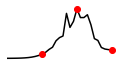

In [29]:
# PLOT HERE
fig, axs = plt.subplots(figsize=(2, 1), facecolor='w', edgecolor='k')
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year, SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]/1000000, 'k')
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2030], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030]/1000000, 'r.',markersize=12)
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2040], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040]/1000000, 'r.', markersize=12)
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2050], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050]/1000000, 'r.', markersize=12)
#plt.ylabel('Tonnes')
axs.set_xlim([2020, 2052])
#axs.set_visible(False)
axs.axis('off');


# OBSOLETE BECAUSE FASTER TO DO ON NATION LEVEL

In [32]:
print(failtest)
# so the simulation will stop when reaching here jic

NameError: name 'failtest' is not defined

In [ ]:
#matplotlib.use('Agg')

### Yearly and Cumulative Tables 3 Sigs

In [ ]:
UScumsig3 = UScumsig3.drop(UScumsig3.index[0])
N = 2

UScumsig3 = UScumsig3.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScumsig3 = UScumsig3.applymap(lambda x: int(x))
UScumsig3.head()

In [ ]:
USyearly3sig = USyearly.copy()
UScum3sig = UScum.copy()

USyearly3sig = USyearly3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearly3sig = USyearly3sig.applymap(lambda x: int(x))

UScum3sig = UScum3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScum3sig = UScum3sig.applymap(lambda x: int(x))

USyearly3sig.to_csv(title_Method+' US_Yearly.csv')
UScum3sig.to_csv(title_Method+' US_Cumulative.csv')


In [ ]:
"""
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
"""
pass

## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [ ]:
### Singe Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
#keyword='new_Installed_Capacity_[MW]'

plt.figure()
plt.plot(r1.scenario[PCAs[0]].data['year'], foo, label=PCAs[12])
plt.title(keyword)
plt.legend()

for jj in range (1, len(PCAs)): 
    foo['silver'] += r1.scenario[PCAs[jj]].material['silver'].materialdata[keyword]


fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(r1.scenario[PCAs[0]].data['year'], foo['silver'], label='US')
plt.title("Material Landfilled per Year US")
#ax.set_yscale('log')
print(max(foo))
"""
pass

In [ ]:
### Verbose Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearlyWASTE=pd.DataFrame()

# Loop over Materials
for ii in range (0, len(materials)):    
    material = materials[ii]
    foo1 = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo1 = foo1.to_frame(name=material)
    foo2 = r2.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo2 = foo2.to_frame(name=material)
    foo3 = r3.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo3 = foo3.to_frame(name=material)

    USyearlyWASTE[r1.name + '_' + material] = foo1[material]
    USyearlyWASTE[r2.name + '_' + material] = foo2[material]
    USyearlyWASTE[r3.name + '_' + material] = foo3[material]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearlyWASTE[r1.name + '_' + material] += r1.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r2.name + '_' + material] += r2.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r3.name + '_' + material] += r3.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearlyWASTE.head(20)
"""
pass

In [ ]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[STATEs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_"+material+'_'+obj.name] = foo[material]

        # Loop over STATEs
        for jj in range (1, len(STATEs)): 
            USyearly["Waste_"+material+'_'+obj.name] += obj.scenario[STATEs[jj]].material[material].materialdata[keyword]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name)) ]
    USyearly['Waste_Module_'+obj.name] = USyearly[filter_col].sum(axis=1)
    
# Converting to grams to Tons. 
USyearly.head(20)

In [ ]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[STATEs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+obj.name] = foo[material]

        # Loop over STATEs
        for jj in range (1, len(STATEs)): 
            USyearly["VirginStock_"+material+'_'+obj.name] += obj.scenario[STATEs[jj]].material[material].materialdata[keyword]
            
    filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj.name)) ]
    USyearly['VirginStock_Module_'+obj.name] = USyearly[filter_col].sum(axis=1)


### Converting to grams to METRIC Tons. 


In [ ]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


### Adding Installed Capacity to US

In [ ]:
 obj.scenario[STATEs[0]].data.keys()

In [ ]:
keyword='new_Installed_Capacity_[MW]'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[STATEs[0]].data[keyword]
    foo = foo.to_frame(name=keyword)
    USyearly[keyword+obj.name] = foo[keyword]

    # Loop over STATEs
    for jj in range (1, len(STATEs)): 
        USyearly[keyword+obj.name] += obj.scenario[STATEs[jj]].data[keyword]

USyearly.head(20)

In [ ]:
keyword='Installed_Capacity_[W]'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[STATEs[0]].data[keyword]
    foo = foo.to_frame(name=keyword)
    USyearly["Capacity_"+obj.name] = foo[keyword]

    # Loop over STATEs
    for jj in range (1, len(STATEs)): 
        USyearly["Capacity_"+obj.name] += obj.scenario[STATEs[jj]].data[keyword]

USyearly.head(20)

### Creative Cumulative DataFrame and Saving

In [ ]:
USyearly.index = obj.scenario[STATEs[0]].data['year']

In [ ]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

In [ ]:

USyearly.to_csv(title_Method+' US_Yearly.csv')
UScum.to_csv(title_Method+' US_Cumulative.csv')


# PLOTTING GALORE

In [ ]:
keywords=['VirginStock_', 'Waste_', 'Capacity']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        obj = SFScenarios[kk]
        plt.figure()
        plt.plot([],[],color='m', label='glass', linewidth=5)
        plt.plot([],[],color='c', label='silicon', linewidth=5)
        plt.plot([],[],color='r', label='silver', linewidth=5)
        plt.plot([],[],color='k', label='copper', linewidth=5)
        plt.plot([],[],color='g', label='aluminum', linewidth=5)

        plt.stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['m','c','r','k', 'g'])
        plt.ylabel('Mass [Tons]')
        plt.xlim([2010, 2050])
        plt.title('Yearly '+keyw+ ' ' + obj.name)
        plt.legend(materials)


In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 
       
for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

        
# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 




for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

  #  axs[i].set_yscale('log')
  #  axs[i+3].set_yscale('log')
  #  axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)


In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

    axs[i].set_yscale('log')
    axs[i+3].set_yscale('log')
    axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)


In [ ]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                      USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(obj.name)
    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3, 1e8])
    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name], color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name], color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 5e7])
    axs[i+3].set_ylim([0, 3e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Tonnes]')
axs[3].set_ylabel('Yearly Mass [Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig(title_Method+' Fig_3x3_MaterialNeeds.png', dpi=600)

In [ ]:
import matplotlib as mpl

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

titlesscens = ['Reference Scenario', 'Grid Decarbonization Scenario', 'High Electrification Scenario']


for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='c', alpha=0.5, label='Glass')
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[1]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[2]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[3]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[4]+'_'+obj.name]/1e6, 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(titlesscens[kk])
    axs[i].legend(loc='lower right')

    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name]/1e6, 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3/1e6, 1e8/1e6])
    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name]/1e6, color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name]/1e6, color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    axs[i].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 5e7/1e6])
    axs[i+3].set_ylim([0, 3e6/1e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Million Tonnes]')
axs[3].set_ylabel('Yearly Mass [Million Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig(title_Method+' Fig_3x3_MaterialNeeds.png', dpi=600)

## Mining Capacity + Virgin Needs Plot

In [ ]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

In [ ]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

titlesscens = ['Reference Scenario', 'Grid Decarbonization Scenario', 'High Electrification Scenario']

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                      USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(titlesscens[kk])
    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3, 1e8])
    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name], color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name], color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    ax2=axs[i].twinx()
    ax2.axhline(mining2020_aluminum, color = 'g', linestyle='-', linewidth=1.0, label='Production Al')
    ax2.axhline(mining2020_silicon, color = 'k', linestyle='-', linewidth=1.0, label='Production Si')

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()

    ax2=axs[i].twinx()
    ax2.axhline(mining2020_copper, color = 'orange', linestyle='-', linewidth=1.0, label='Production Copper')
    ax2.axhline(mining2020_silver, color = 'gray', linestyle='-', linewidth=1.0, label='Production Silver')
    
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 5e7])
    axs[i+3].set_ylim([0, 3e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Tonnes]')
axs[3].set_ylabel('Yearly Mass [Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)


In [ ]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
i = 0

obj = SFScenarios[2]
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+obj.name]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')
axs.plot(USyearly[keyw+materials[1]+'_'+obj.name]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.plot(USyearly[keyw+materials[4]+'_'+obj.name]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')
axs.plot(USyearly[keyw+materials[3]+'_'+obj.name]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin Material Needs ratio to 2020 Production Capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production.png', dpi=600)

In [ ]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
i = 0

obj = SFScenarios[2].name
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+SFScenarios[2].name]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')
axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+SFScenarios[0].name]*100/mining2020_silver, USyearly[keyw+materials[2]+'_'+SFScenarios[2].name]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    
axs.plot(USyearly[keyw+materials[1]+'_'+SFScenarios[2].name]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+SFScenarios[0].name]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+SFScenarios[2].name]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)

axs.plot(USyearly[keyw+materials[4]+'_'+SFScenarios[2].name]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+SFScenarios[0].name]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+SFScenarios[2].name]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)


axs.plot(USyearly[keyw+materials[3]+'_'+SFScenarios[2].name]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+SFScenarios[0].name]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+SFScenarios[2].name]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)

axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin material needs as a percentage of 2020 global mining production capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production.png', dpi=600)

# TABLES 

In [ ]:
USyearlysig3 = USyearly.copy()
USyearlysig3 = USyearlysig3.drop(USyearlysig3.index[0])
N = 2

USyearlysig3 = USyearlysig3.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearlysig3 = USyearlysig3.applymap(lambda x: int(x))
USyearlysig3.head()
#for col in USyearlysig3:
#    USyearlysig3[col].apply(lambda x: round(x, N - int(np.floor(np.log(abs(x))))))


In [ ]:
UScumsig3 = UScum.copy()
UScumsig3 = UScumsig3.drop(UScumsig3.index[0])
N = 2

UScumsig3 = UScumsig3.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScumsig3 = UScumsig3.applymap(lambda x: int(x))
UScumsig3.head()

In [ ]:
materials = ['Module', 'glass', 'aluminum', 'copper', 'silicon', 'silver']

print(" Metric Tonnes Installed in field in 2030")
print(" ######################################### \n")
#Loop over scenarios
for kk in range (0, 3):
    obj = SFScenarios[kk]
    print("SCENARIO :", obj.name)

    print("********************************")
    print("********************************")

    modulemat = 0
    for ii in range(0, len(materials)):
        installedmat = (UScumsig3['VirginStock_'+materials[ii]+'_'+obj.name].loc[2030]-
              UScumsig3['Waste_'+materials[ii]+'_'+obj.name].loc[2030])
        print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

    print("Capacity in Year 2030 [GW]:", round(USyearlysig3['Capacity_'+obj.name].loc[2030]/1e9))
    print("Capacity in Year 2050 [GW]:", round(USyearlysig3['Capacity_'+obj.name].loc[2050]/1e9))
    print("****************************\n")

In [ ]:
print(" VIRGIN STOCK Yearly Needs ")
print(" **************************")
for kk in range(0, 3):
    obj = SFScenarios[kk]
    print(obj.name)
    filter_col = [col for col in USyearlysig3 if (col.startswith('VirginStock_') and col.endswith(obj.name)) ]
    display(USyearlysig3[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")
    
print(" VIRGIN STOCK Cumulative Needs ")
print(" ***************************** ")
for kk in range(0, 3):
    obj = SFScenarios[kk]
    print(obj.name)
    filter_col = [col for col in UScumsig3 if (col.startswith('VirginStock_') and col.endswith(obj.name)) ]
    display(UScumsig3[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")

In [ ]:
print(" WASTE CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScumsig3 if (col.startswith('Waste_Module')) ]
display(UScumsig3[filter_col].loc[[2016,2020,2030, 2040, 2050]])


In [ ]:
# Same as above cell but in more lines
"""
materials = ['glass', 'aluminum', 'copper', 'silicon', 'silver']

print(" WASTE CUMULATIVE RESULTS ")
print(" ***********************")
#Loop over scenarios
for kk in range (0, 3):
    obj = SFScenarios[kk]
    print("SCENARIO :", obj.name)
    modulewaste2016 = 0
    modulewaste2020 = 0
    modulewaste2030 = 0
    modulewaste2040 = 0
    modulewaste2050 = 0

    for ii in range(0, len(materials)):
        modulewaste2016 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[7]
        modulewaste2020 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[11]
        modulewaste2030 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[21]
        modulewaste2040 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[31]
        modulewaste2050 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[41]

    print('Module Waste 2016:', round(modulewaste2016/1000)*1000, 'tons') 
    print('Module Waste 2020:', round(modulewaste2020/1000)*1000, 'tons') 
    print('Module Waste 2030:', round(modulewaste2030/1000)*1000, 'tons') 
    print('Module Waste 2040:', round(modulewaste2040/1000)*1000, 'tons') 
    print('Module Waste 2050:', round(modulewaste2050/1000)*1000, 'tons') 

    print("****************************")
"""
pass

## DWARAKS PLOT

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, ax = plt.subplots()

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label=obj.name+' glass mass only')
ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label=obj.name+' glass mass only')
ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 2
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label=obj.name+' glass mass only')

ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

# color = 'C1'
plt.legend()
plt.title('Yearly Virgin Material Needs by Scenario')
plt.ylabel('Mass [tons]')
    
    

#### Organizing Cumulative 2050 material needs for Materials / Scenarios

In [ ]:
#This is in the plots
"""
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050
"""
pass

#### Calculating Bottoms for stacked bar plots... ugh.

In [ ]:
#This is in the plots
"""
dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
"""
pass

##### Virgin Needs

In [ ]:
keywords

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']



f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: Reference Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: Reference Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: Grid Decarbonization Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: Grid Decarbonization Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: High Electrification Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3: High Electrification Scenario, glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind)
a1.set_xticklabels(['S1', 'S2', 'S3'])
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))


f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives.png', dpi=600)

##### Waste

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
print(keyw)
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: Reference Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: Reference Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: Grid Decarbonization Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: Grid Decarbonization, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: High Electrification Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3:High Electrification Scenario, glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Waste Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050 = dfcumulations2050/1000000

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
             
a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))
a1.set_xticks(ind)
a1.set_xticklabels(['S1', 'S2', 'S3'])

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly WASTE by Scenario and Cumulatives.png', dpi=600)

##### Another option

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (14, 8)
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, a0 = plt.subplots(1, 1)

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

othermat = (USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
a0.bar(obj.scenario[STATEs[0]].data['year'], glassmat, label='S1: '+obj.name+' glass mass only')
a0.bar(obj.scenario[STATEs[0]].data['year'], othermat,bottom=glassmat, label='S1: '+obj.name+'other materials mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat,'k', label='S1: '+obj.name+' Module mass   |  Cumulative Installed Capacity [GW] (right axis)')

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g', label='S2: '+obj.name+' Module mass  |  Cumulative Installed Capacity [GW] (right axis)')



# SCENARIO 3***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c', label='S3: '+obj.name+' Module mass  |  Cumulative Installed Capacity [GW] (right axis)')



########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


### Install Capacity

ax2=a0.twinx()
ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly['Capacity_'+SFScenarios[0].name]/1e9, 'k', label='S1: Cumulative Installed Capacity [GW] (right axis)')
ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly['Capacity_'+SFScenarios[1].name]/1e9, 'g', label='S2: Cumulative Installed Capacity [GW] (right axis)')
ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly['Capacity_'+SFScenarios[2].name]/1e9, 'c', label='S3: Cumulative Installed Capacity [GW] (right axis)')
ax2.set_yscale('log')
ax2.set_ylabel('Cumulative Installed Capacity [GW]')

a0.set_ylabel('Mass [tons]')
a0.set_title('Yearly Waste Material by Scenario and Module Component')
a0.legend(bbox_to_anchor=(0.10, -0.3), loc='lower left')
#ax2.legend()


### SIZE WASTE COMPARISON


In [ ]:
keyword='Cumulative_Area_disposed'

USyearly_Areadisp=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[STATEs[0]].data[keyword].copy()
    USyearly_Areadisp["Areadisp_"+obj.name] = foo

    # Loop over STATEs
    for jj in range (1, len(STATEs)): 
        USyearly_Areadisp["Areadisp_"+obj.name] += obj.scenario[STATEs[jj]].data[keyword]

In [ ]:
UScum_Areadisp = USyearly_Areadisp.copy()
UScum_Areadisp = UScum_Areadisp.cumsum()

In [ ]:
A = UScum['Waste_Module_Reference.Mod'].iloc[-1]
#47700000 # tonnes cumulative by 2050
A = A*1000 # convert to kg
A = A/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
A = A/1e6 # Convert to km 2
print(A)

In [ ]:
B = UScum['Waste_Module_95-by-35_Elec.Adv_DR'].iloc[-1]
#47700000 # tonnes cumulative by 2050
B = B*1000 # convert to kg
B = B/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
B = B/1e6 # Convert to km 2
print(B)

In [ ]:
C = UScum_Areadisp['Areadisp_Reference.Mod'].iloc[-1]/1e6
D = UScum_Areadisp['Areadisp_95-by-35_Elec.Adv_DR'].iloc[-1]/1e6

In [ ]:
# MANHATTAN SIZE:
manhattans = 59.103529

In [ ]:
print("Cumulative Area by 2050 of Waste PV Modules", C, " km^2")
print("Cumulative Area by 2050 of Waste PV Modules", D, " km^2")
print("Cumulative Area by 2050 of Waste PV Material", A, " km$^2$")
print("Cumulative Area by 2050 of Waste PV Material", B, " km$^2$")
print("")
print("Reference Waste equals ", C/manhattans, " Manhattans ")

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6, 'b', label='Cumulative New Yearly Installs')
axs.plot(USyearly['Capacity_Reference.Mod']/1e12, 'g', label='Active in Field Installs')
axs.plot(UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6-USyearly['Capacity_Reference.Mod']/1e12, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)


In [ ]:
E = (UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6).sum()
F = (UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6-USyearly['Capacity_Reference.Mod']/1e12).sum()
print("Cumulative Installs", E)
print("Cumulative Waste", F)
print("Fraction of Decomisioned to Installed Cumulative by 2050", F/E)


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(USyearly['new_Installed_Capacity_[MW]Reference.Mod']/1e6, 'b', label='Yearly New Yearly Installs')
axs.plot(UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6-USyearly['Capacity_Reference.Mod']/1e12, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_Decomisions', dpi=600)


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)


plt.plot(UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6/UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6, 'b', label='Cumulative New Yearly Installs')
plt.plot(USyearly['Capacity_Reference.Mod']/1e12/UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6, 'g', label='Active in Field Installs')
plt.plot((UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6-USyearly['Capacity_Reference.Mod']/1e12)/UScum['new_Installed_Capacity_[MW]Reference.Mod']/1e6, 'r', label='Decomissioned PV Panels')
plt.legend()
plt.xlim([2020,2050])
plt.ylabel('Power [TW]')


In [ ]:
# VALIDATION COMPARISON VALUES

In [ ]:
USyearly.iloc[21]

In [ ]:
USyearly['Capacity_Reference.Mod'].iloc[21]

In [ ]:
7.766749e+11

In [ ]:
UScum.iloc[-1]
print(" Cumulative Waste by 2050, Reference Scenario: ", UScum['Waste_Module_Reference.Mod'].iloc[-1]/1e6, ' Million Tonnes')
print(" cumulative Waste by 2050, Grid Decarbonization Scenario: ", UScum['Waste_Module_95-by-35.Adv'].iloc[-1]/1e6, ' Million Tonnes')
print(" cumulative Waste by 2050, High Electrification Scenario: ", UScum['Waste_Module_95-by-35_Elec.Adv_DR'].iloc[-1]/1e6, ' Million Tonnes')